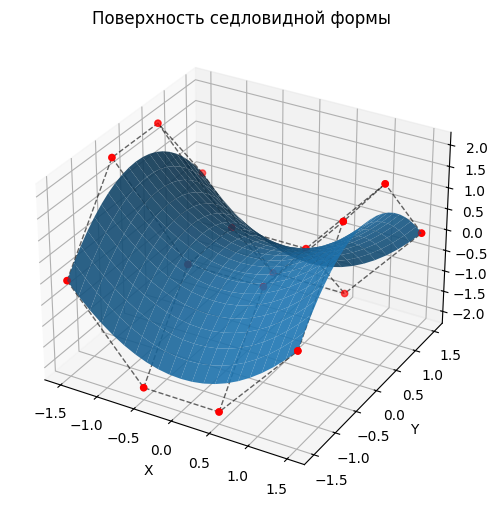

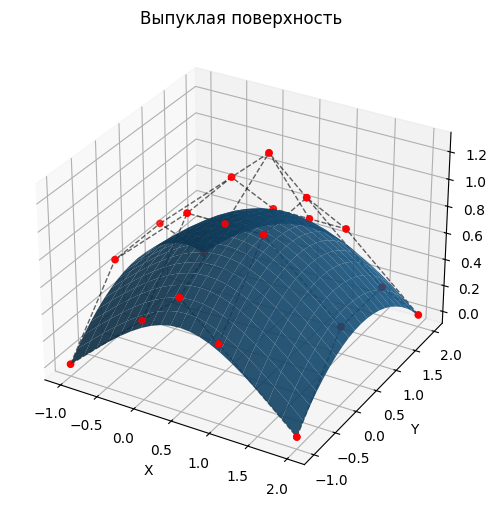

In [4]:


import numpy as np
import matplotlib.pyplot as plt


def get_de_casteljau_point(points, t, ):
    b = np.copy(points)
    n = len(points) - 1
    for j in range(1, n + 1):
        for i in range(0, n - j + 1):
            b[i] = (1.0 - t) * b[i] + t * b[i + 1]
    return b[0]


def get_surface_point(control_points, u, v, alpha):
    temp = [get_de_casteljau_point(row, u) for row in control_points]
    return get_de_casteljau_point(temp, v)


def bezier_surface_points(control_points, alpha=0.05):
    # Порядок кривой
    n = len(control_points) - 1
    if n < 0:
        raise ValueError()
    if n == 0:
        return control_points
    x, y, z = [], [], []
    for u in np.arange(0, 1 + alpha, alpha):
        x.append([])
        y.append([])
        z.append([])
        for v in np.arange(0, 1 + alpha, alpha):
            p = get_surface_point(control_points, u, v, alpha)
            x[-1].append(p[0])
            y[-1].append(p[1])
            z[-1].append(p[2])
    return np.array(x), np.array(y), np.array(z)


def plot_control_points(ax, control_points):
    for row in control_points:
        xs, ys, zs = zip(*row)
        ax.plot(xs, ys, zs, 'k--', linewidth=1, alpha=0.6)
        ax.scatter(xs, ys, zs, color='red', s=20)
    for col in range(control_points.shape[1]):
        col_points = control_points[:, col]
        xs, ys, zs = zip(*col_points)
        ax.plot(xs, ys, zs, 'k--', linewidth=1, alpha=0.6)
        ax.scatter(xs, ys, zs, color='red', s=20)


saddle_points = np.array([
    [[-1.5, -1.5, 0.0], [-1.5, -0.5, 2.0], [-1.5, 0.5, 2.0], [-1.5, 1.5, 0.0]],
    [[-0.5, -1.5, -2.0], [-0.5, -0.5, 0.0], [-0.5, 0.5, 0.0], [-0.5, 1.5, -2.0]],
    [[0.5, -1.5, -2.0], [0.5, -0.5, 0.0], [0.5, 0.5, 0.0], [0.5, 1.5, -2.0]],
    [[1.5, -1.5, 0.0], [1.5, -0.5, 2.0], [1.5, 0.5, 2.0], [1.5, 1.5, 0.0]]
])
X1, Y1, Z1 = bezier_surface_points(saddle_points, alpha=0.05)
fig1 = plt.figure(figsize=(7, 6))
ax1 = fig1.add_subplot(111, projection='3d')
ax1.plot_surface(X1, Y1, Z1, alpha=0.9)
plot_control_points(ax1, saddle_points)
ax1.set_title("Поверхность седловидной формы")
ax1.set_xlabel("X")
ax1.set_ylabel("Y")
ax1.set_zlabel("Z")

convex_points = np.array([
    [[-1, -1, 0], [0, -1, 0.5], [0.5, -1, 0.75], [1, -1, 0.5], [2, -1, 0]],
    [[-1, 0, 0.5], [0, 0, 1], [0.5, 0, 1], [1, 0, 1], [2, 0, 0.5]],
    [[-1, 1, 0.5], [0, 1, 1], [0.5, 1, 1.25], [1, 1, 1], [2, 1, 0.5]],
    [[-1, 2, 0], [0, 2, 0.5], [0.5, 2, 0.5], [1, 2, 0.5], [2, 2, 0]],
])

X2, Y2, Z2 = bezier_surface_points(convex_points, alpha=0.05)
fig2 = plt.figure(figsize=(7, 6))
ax2 = fig2.add_subplot(111, projection='3d')
ax2.plot_surface(X2, Y2, Z2, alpha=0.9)
plot_control_points(ax2, convex_points)
ax2.set_title("Выпуклая поверхность")
ax2.set_xlabel("X")
ax2.set_ylabel("Y")
ax2.set_zlabel("Z")

plt.show()

